<a href="https://colab.research.google.com/github/tamim-cloud/Data_Representation_and_Vectorization/blob/main/Data_Representation_and_Vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. One Hot Encoding**

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

data=np.array(['red','green','blue','red','green','white','black']).reshape(-1,1)

encoder=OneHotEncoder() #sparse_output=False kora nai


encoded_data=encoder.fit_transform(data)

print(encoded_data)

  (0, 3)	1.0
  (1, 2)	1.0
  (2, 1)	1.0
  (3, 3)	1.0
  (4, 2)	1.0
  (5, 4)	1.0
  (6, 0)	1.0


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

data="this is tamim, i am from varendra university. today i practice data procerssing and vectorization"
tokens=word_tokenize(data)

array_data=np.array(tokens).reshape(-1,1)

encoder=OneHotEncoder(sparse_output=False) #sparse_output=False kora nai
encoded_data=encoder.fit_transform(array_data)

print(encoded_data)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = {
    'City': ['New York', 'London', 'Paris', 'New York', 'Tokyo', 'London'],
    'Temperature': [25, 20, 22, 26, 28, 19]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)
print("-" * 30)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_features = encoder.fit_transform(df[['City']])

feature_names = encoder.get_feature_names_out(['City'])

encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

df_encoded = pd.concat([df.drop('City', axis=1), encoded_df], axis=1)

print("DataFrame after One-Hot Encoding:")
print(df_encoded)

print("\nTransforming new data with 'Berlin':")
new_data = pd.DataFrame({'City': ['Berlin', 'New York'], 'Temperature': [15, 30]})
print("New Data:")
print(new_data)

new_encoded_features = encoder.transform(new_data[['City']])
new_encoded_df = pd.DataFrame(new_encoded_features, columns=feature_names)
new_df_encoded = pd.concat([new_data.drop('City', axis=1), new_encoded_df], axis=1)

print("\nTransformed New Data:")
print(new_df_encoded)


Original DataFrame:
       City  Temperature
0  New York           25
1    London           20
2     Paris           22
3  New York           26
4     Tokyo           28
5    London           19
------------------------------
DataFrame after One-Hot Encoding:
   Temperature  City_London  City_New York  City_Paris  City_Tokyo
0           25          0.0            1.0         0.0         0.0
1           20          1.0            0.0         0.0         0.0
2           22          0.0            0.0         1.0         0.0
3           26          0.0            1.0         0.0         0.0
4           28          0.0            0.0         0.0         1.0
5           19          1.0            0.0         0.0         0.0

Transforming new data with 'Berlin':
New Data:
       City  Temperature
0    Berlin           15
1  New York           30

Transformed New Data:
   Temperature  City_London  City_New York  City_Paris  City_Tokyo
0           15          0.0            0.0         0.0    

**2. Bag of words**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

df = pd.DataFrame({
    "text": [
        "people watch dswithbappy",
        "dswithbappy watch dswithbappy",
        "people write comment",
        "dswithbappy write comment"
    ],
    "output": [1, 1, 0, 0]
})

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

X.toarray()



array([[0, 1, 1, 1, 0],
       [0, 2, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 0, 1]])

In [ ]:
print(vectorizer.vocabulary_) #uniquely prottekta word er shathe ekta kore unique number create korbe

{'people': 2, 'watch': 3, 'dswithbappy': 1, 'write': 4, 'comment': 0}


Ngrams

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

df=pd.DataFrame({"text": ["people watch dswithbappy", "dswithbappy watch dswithbappy", "people write comment", "dswithbappy write comments"], "output": [1,1,0,0]})

vectorizer=CountVectorizer(ngram_range=(2,2))
X=vectorizer.fit_transform(df['text'])

X.toarray()


array([[0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1]])

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

text_data=["this is tamim, i am from varendra university. today i practice data procerssing and vectorization"]
#sent_tokens=sent_tokenize(text_data)
#word_tokens=word_tokenize(text_data)
#df_word=pd.DataFrame({"text": word_tokens})
vectorizer=CountVectorizer(ngram_range=(2,2))
x=vectorizer.fit_transform(text_data)
print(x.toarray())


print('-'*50)
df=pd.DataFrame({"text": ["people watch dswithbappy", "dswithbappy watch dswithbappy", "people write comment", "dswithbappy write comments"], "output": [1,1,0,0]})
vectorizer=CountVectorizer(ngram_range=(2,2))
X=vectorizer.fit_transform(df['text'])

X.toarray()


[[1 1 1 1 1 1 1 1 1 1 1 1]]
--------------------------------------------------


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array([[0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1]])

In [ ]:
print(vectorizer.vocabulary_)

{'people watch': 2, 'watch dswithbappy': 4, 'dswithbappy watch': 0, 'people write': 3, 'write comment': 5, 'dswithbappy write': 1, 'write comments': 6}


**TF-IDF 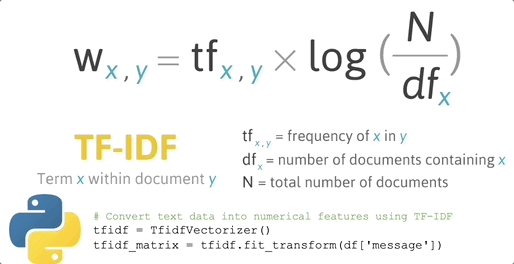![image.png]()**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.DataFrame({
    "text": [
        "people watch dswithbappy",
        "dswithbappy watch dswithbappy",
        "people write comment",
        "dswithbappy write comments"
    ],
    "output": [1, 1, 0, 0]
})

vectorizer = TfidfVectorizer() #ngram_range=(2, 2)
X = vectorizer.fit_transform(df['text'])

print(X.toarray())

print(vectorizer.get_feature_names_out())


[[0.         0.         0.49681612 0.61366674 0.61366674 0.        ]
 [0.         0.         0.8508161  0.         0.52546357 0.        ]
 [0.66767854 0.         0.         0.52640543 0.         0.52640543]
 [0.         0.70203482 0.44809973 0.         0.         0.55349232]]
['comment' 'comments' 'dswithbappy' 'people' 'watch' 'write']


**Word2Vec 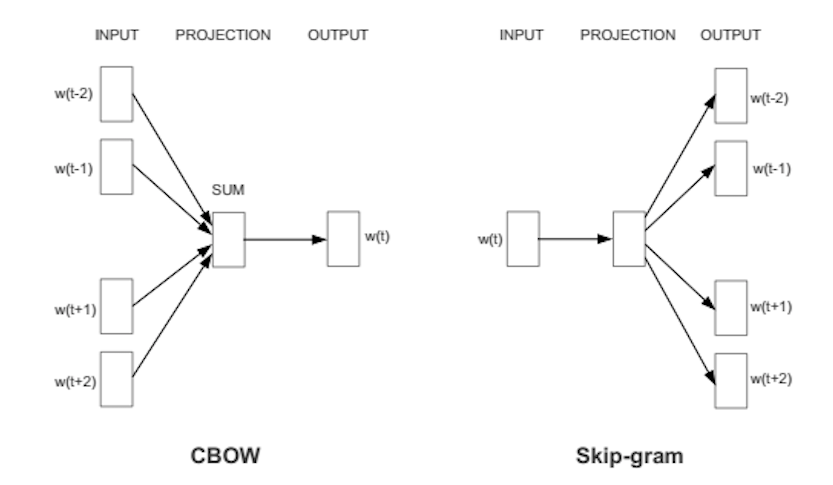**

In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# 1. Data preparation
df = pd.DataFrame({
    "text": [
        "people watch dswithbappy",
        "dswithbappy watch dswithbappy",
        "people write comment",
        "dswithbappy write comments"
    ],
    "output": [1, 1, 0, 0]
})

# 2. Tokenization (word-level)
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in df['text']]

# 3. Train Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=2, min_count=1, workers=2)

# 4. Test: Get vector for word 'dswithbappy'
print(model.wv['dswithbappy'])

# 5. Test: Find most similar words
print(model.wv.most_similar('dswithbappy'))


[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e-03  2.46979

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


11.08.2025

In [ ]:
import numpy as np
import pandas as pd
import gensim
import os

In [ ]:
!pip install --upgrade gensim --user

In [ ]:
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess
import nltk
nltk.download('punkt')
nltk.download('punk_tab')
import chardet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading punk_tab: Package 'punk_tab' not found in
[nltk_data]     index


In [ ]:
story = []

for filename in os.listdir('upload_data'):
    if filename == '.ipynb_checkpoints':
        continue
    file_path = os.path.join('upload_data', filename)
    with open(file_path, 'rb') as file:
        result = chardet.detect(file.read())
    encoding_used = result['encoding']
    with open(file_path, encoding=encoding_used, errors='ignore') as f:
        corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

#print(story)

FileNotFoundError: [Errno 2] No such file or directory: 'upload_data'

In [ ]:
story[:10]

In [ ]:
model=gensim.models.Word2Vec(window=10,min_count=2)

In [ ]:
print(model)

In [ ]:
model.build_vocab(story)

In [ ]:
model.train(story,total_examples=model.corpus_count,epochs=model.epochs)

In [ ]:
vec=model.wv.get_normed_vectors()

In [ ]:
print(vec[0])

In [ ]:
print(len(vec[0]))

In [ ]:
model.wv.most_similar('daenerys')

In [ ]:
model.wv.similarity('arya','sansa')

In [ ]:
y=model.wv.index_to_key

In [ ]:
len(y)

In [ ]:
from sklearn.decomposition import  PCA

In [ ]:
pca=PCA(n_components=3)

In [ ]:
x=pca.fit_transform(model.wv.get_normed_vectors())

In [ ]:
x

# **Demo**

In [ ]:
!pip install emoji